# CGreen - MSDS692 Project Code - ML and Extremist Ideology
This code takes in extremist attack information from 1970 to 2019 and tests whether KNN can accurately assign ideologicla motivation based on the characteristics of the attack.

## Loading Packages and Setting Pandas Options

In [1]:
# pandas
import pandas as pd

# sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

# plotting
!conda install -c conda-forge scikit-plot -y
from scikitplot.estimators import plot_feature_importances
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
%matplotlib inline
sns.set() 

# others
import numpy as np
import scipy.stats as stats

Solving environment: done

# All requested packages already installed.



In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

## Importing Initial Datasets
Data for this project came in two parts. The GTD data contained attack information from 1970-2019 without ideological motivation. The PPT data contained information on specific groups and their ideologies. Merging the two allowed me to link together the attacks to dominant ideologies.

In [3]:
df_GTD = pd.read_csv('20220210_GTD.csv')
df_PPT = pd.read_csv('20220210_PPT.csv')

In [4]:
df_GTD.shape

(3004, 35)

In [5]:
df_PPT.shape

(239, 45)

For the join operation, I reviewed the 2022 article by Lee and the 2021 article by Stratis for reminders on the merge function in Pandas.

In [6]:
df_combined = pd.merge(df_GTD, df_PPT, on='ORGNAME', how='inner')

In [7]:
df_combined.shape

(2969, 79)

In [8]:
df_combined.head()

,Event ID#,Year,Month,Day,State,City,LAT,LONG,Summary,Successful,Suicide,Attack Type,Attack Type Text,Target Type,Target Type Text,Target,ORGNAME,Motive,Unaffiliated Individual,Claim,Weapon Type,Weapon Type Text,Weapon Sub-Type,Weapon Sub-Type Text,Number Killed,Number Wounded,Number Attackers Killed,Number Atackers Wounded,Property Damage,Property Damage Extent,Damage Extent Text,Kidnapping,Number Hostages,Ransom Demand,Hostage/Kidnapping Outcome,DOM_I,I_ETHNO,I_REL,I_REL_1,I_REL_2,I_REL_3,I_REL_4,I_REL_5,I_REL_6,I_REL_7,I_REL_8,I_REL_9,I_REL_10,I_RACE,I_RACE_1,I_RACE_2,I_RACE_3,I_LEFT,I_LEFT_1,I_LEFT_2,I_LEFT_3,I_LEFT_4,I_LEFT_5,I_LEFT_6,I_RIGHT,I_RIGHT_1,I_RIGHT_2,I_RIGHT_3,I_RIGHT_4,I_SI,I_SI_1,I_SI_2,I_SI_3,I_SI_4,I_SI_5,I_SI_6,I_SI_7,I_SI_8,I_SI_9,I_SI_10,I_SI_11,I_SI_12,I_SI_13,I_SI_14
0,197001010002,1970,1,1,Illinois,Cairo,37.005105,-89.176269,"1/1/1970: Unknown African American assailants fired several bullets at police headquarters in Cairo, Illinois, United States. There were no casualties, however, one bullet narrowly missed several police officers. This attack took place during heightened racial tensions, including a Black boycott of White-owned businesses, in Cairo Illinois.",1,0,2,Armed Assault,3,Police,Cairo Police Headquarters,Black Nationalists,To protest the Cairo Illinois Police Deparment,0,0.0,5,Firearms,5.0,Unknown Gun Type,0.0,0.0,0.0,0.0,1,3.0,Minor (likely < $1 million),0.0,NaN,0.0,NaN,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1,0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0
1,197001120001,1970,1,12,New York,New York City,40.697132,-73.931351,"1/12/1970: Unknown perpetrators threw a pipe bomb into the vacant dean's office of James Madison High School in Brooklyn, New York, United States. There were no casualties but the explosion caused minor damages. Earlier in the day anti-war and pro-Black Panther statements were discovered painted outside the walls of the school.",1,0,3,Bombing/Explosion,8,Educational Institution,James Madison High School,Black Nationalists,Suspected motives were to protest the Vietnam War and/or show support for the Black Panther Party and/or show support for the Young Lords.,0,0.0,6,Explosives,31.0,Pipe Bomb,0.0,0.0,0.0,0.0,1,3.0,Minor (likely < $1 million),0.0,NaN,0.0,NaN,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1,0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0
2,197001130001,1970,1,13,Washington,Seattle,47.610786,-122.331306,"1/13/1970: Unknown perpetrators firebombed Fuson's Department Store in Seattle, Washington, United States. There were no casualties but the store sustained an estimated $17,000 in damages. Less than a week earlier, the store owner shot and killed an African American male attempting to rob the store.",1,0,7,Facility/Infrastructure Attack,1,Business,"Fuson's Department Store, Seattle Washington",Black Nationalists,Retaliation for the store owner who shot and killed an African American attempting to commit a robbery at his store.,0,0.0,8,Incendiary,19.0,Molotov Cocktail/Petrol Bomb,0.0,0.0,0.0,0.0,1,3.0,Minor (likely < $1 million),0.0,NaN,0.0,NaN,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1,0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0
3,197001140001,1970,1,14,Illinois,Champaign,40.116748,-88.239270,"1/14/1970: Suspected Black militants threw two firebombs into the Champaign Police Department in Champaign, Illinois, United States. The building was damaged and one police officer was severely burned.",1,0,7,Facility/Infrastructure Attack,3,Police,Champaign Police Department,Black Nationalists,NaN,0,0.0,8,Incendiary,19.0,Molotov Cocktail/Petrol Bomb,0.0,1.0,0.0,0.0,1,3.0,Minor (likely < $1 million),0.0,NaN,0.0,NaN,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1,0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0
4,197001190002,1970,1,19,Washington,Seattle,47.610786,-122.331306,"1/17/1970: Three African Americans were suspected of detonating a bomb on the Seattle University campus in Seattle, Washington, United States. There were no casualties but the Liberal 

In [9]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2969 entries, 0 to 2968
Data columns (total 79 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Event ID#                   2969 non-null   int64  
 1   Year                        2969 non-null   int64  
 2   Month                       2969 non-null   int64  
 3   Day                         2969 non-null   int64  
 4   State                       2969 non-null   object 
 5   City                        2969 non-null   object 
 6   LAT                         2968 non-null   float64
 7   LONG                        2968 non-null   float64
 8   Summary                     1927 non-null   object 
 9   Successful                  2969 non-null   int64  
 10  Suicide                     2969 non-null   int64  
 11  Attack Type                 2969 non-null   int64  
 12  Attack Type Text            2969 non-null   object 
 13  Target Type                 2969 

#### Exporting the combined set for further analysis
At this point I exported the combined set out to Excel for further analysis. It was easier to visualize the connections and features outside of Jupyter and it also gave me an expanded platform for data visualization.

In [10]:
df_combined.to_excel("combined.xlsx")

## Importing the Cleaned, Combined Dataset
After cleaning and shaping the data in Excel, I re-imported the dataset for use in our ML test.

In [11]:
df = pd.read_csv('20220217 Combined for ML_No I Codes.csv')

In [12]:
df.shape

(2394, 19)

In [13]:
df.head()

,Event ID#,Year,Month,Day,State,City,Group,Unaffiliated Individual,Claim,Successful,Suicide,Type,Target,Weapon,Casualties,Property Damage,Kidnapping,Ransom Demand,Dominant Ideology
0,197001010002,1970,1,1,Illinois,Cairo,Black Nationalists,0,0,1,0,Armed Assault,Police,Firearms,0,1,0,0,Extreme Left Wing
1,197001020003,1970,1,2,Wisconsin,Madison,New Year's Gang,0,1,1,0,Facility/Infrastructure Attack,Military,Incendiary,0,1,0,0,Single Issue
2,197001030001,1970,1,3,Wisconsin,Madison,New Year's Gang,0,0,1,0,Facility/Infrastructure Attack,Government (General),Incendiary,0,1,0,0,Single Issue
3,197001050001,1970,1,1,Wisconsin,Baraboo,"Weather Underground, Weathermen",0,0,0,0,Bombing/Explosion,Military,Explosives,0,0,0,0,Extreme Left Wing
4,197001060001,1970,1,6,Colorado,Denver,Left-Wing Militants,0,0,1,0,Facility/Infrastructure Attack,Military,Incendiary,0,1,0,0,Extreme Left Wing


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2394 entries, 0 to 2393
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Event ID#                2394 non-null   int64 
 1   Year                     2394 non-null   int64 
 2   Month                    2394 non-null   int64 
 3   Day                      2394 non-null   int64 
 4   State                    2394 non-null   object
 5   City                     2394 non-null   object
 6   Group                    2394 non-null   object
 7   Unaffiliated Individual  2394 non-null   int64 
 8   Claim                    2394 non-null   int64 
 9   Successful               2394 non-null   int64 
 10  Suicide                  2394 non-null   int64 
 11  Type                     2394 non-null   object
 12  Target                   2394 non-null   object
 13  Weapon                   2394 non-null   object
 14  Casualties               2394 non-null  

## Prepping the features for ML Test
I had to convert a number of features from categories/objects to numerical variables so that the algorithm could recognize them. I used my notes from MSDS650 and reviewed the 2021 article by Chen and the 2017 article by Moffitt for additional reference on this process.

In [15]:
df = pd.get_dummies(df, columns=["Type", "Target", "Weapon", "Dominant Ideology"])

In [16]:
df.head()

,Event ID#,Year,Month,Day,State,City,Group,Unaffiliated Individual,Claim,Successful,Suicide,Casualties,Property Damage,Kidnapping,Ransom Demand,Type_Armed Assault,Type_Assassination,Type_Bombing/Explosion,Type_Facility/Infrastructure Attack,Type_Hijacking,Type_Hostage Taking (Barricade Incident),Type_Hostage Taking (Kidnapping),Type_Unarmed Assault,Type_Unknown,Target_Abortion Related,Target_Airports & Aircraft,Target_Business,Target_Educational Institution,Target_Food or Water Supply,Target_Government (Diplomatic),Target_Government (General),Target_Journalists & Media,Target_Maritime,Target_Military,Target_NGO,Target_Other,Target_Police,Target_Private Citizens & Property,Target_Religious Figures/Institutions,Target_Telecommunication,Target_Terrorists/Non-State Militia,Target_Tourists,Target_Transportation,Target_Unknown,Target_Utilities,Target_Violent Political Party,Weapon_Biological,Weapon_Chemical,Weapon_Explosives,Weapon_Fake Weapons,Weapon_Firearms,Weapon_Incendiary,Weapon_Melee,Weapon_Other,Weapon_Sabotage Equipment,Weapon_Unknown,"Weapon_Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)",Dominant Ideology_Ethnonationalist-Separatist,Dominant Ideology_Extreme Left Wing,Dominant Ideology_Extreme Right Wing,Dominant Ideology_Religious,Dominant Ideology_Single Issue,Dominant Ideology_Unknown Ideology
0,197001010002,1970,1,1,Illinois,Cairo,Black Nationalists,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,197001020003,1970,1,2,Wisconsin,Madison,New Year's Gang,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,197001030001,1970,1,3,Wisconsin,Madison,New Year's Gang,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
3,197001050001,1970,1,1,Wisconsin,Baraboo,"Weather Underground, Weathermen",0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,197001060001,1970,1,6,Colorado,Denver,Left-Wing Militants,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


## Running the Data though the KNN classifier
There were five Dominant Ideologies (Ethnonationalist-Separatist, Left-Wing, Right-Wing, Religious, and Single Issue). In order to test the KNN accuracy, I decided to run the model against each of these targets separately, adjust based on the optimal K, and then use a K-Fold Cross Validation as a metric/ test for accuracy. This source for this section was my notes from MSDS650.

### KNN Run for Ethnonationalist-Separatist

In [17]:
features = df.drop(['Event ID#', 'Year', 'Month', 'Day', 'State', 'City', 'Group', 'Dominant Ideology_Ethnonationalist-Separatist', 'Dominant Ideology_Extreme Left Wing', 'Dominant Ideology_Extreme Right Wing', 'Dominant Ideology_Religious', 'Dominant Ideology_Single Issue', 'Dominant Ideology_Unknown Ideology'], axis=1)
targets = df['Dominant Ideology_Ethnonationalist-Separatist']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)

In [19]:
scores = []
for k in range(2, 20):
    print(f'Evaluating {k} clusters')

    model = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

Evaluating 2 clusters
Evaluating 3 clusters
Evaluating 4 clusters
Evaluating 5 clusters
Evaluating 6 clusters
Evaluating 7 clusters
Evaluating 8 clusters
Evaluating 9 clusters
Evaluating 10 clusters
Evaluating 11 clusters
Evaluating 12 clusters
Evaluating 13 clusters
Evaluating 14 clusters
Evaluating 15 clusters
Evaluating 16 clusters
Evaluating 17 clusters
Evaluating 18 clusters
Evaluating 19 clusters



Max accuracy = 80.58455114822547%


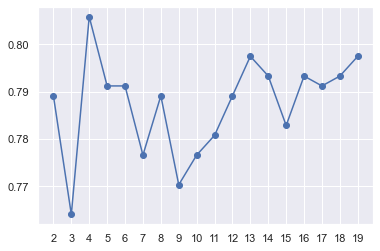

In [20]:
plt.plot(range(2, 20), scores)
plt.scatter(range(2, 20), scores)
plt.xticks(range(2, 20))

print(f'\nMax accuracy = {(max(scores)*100)}%')

In [21]:
model = KNeighborsClassifier(n_neighbors=4, n_jobs=-1)
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.8182767624020888
0.8058455114822547


#### K-Fold Cross Validation for Ethnonationalist-Separatist

In [22]:
seed = 42
num_folds = 5
scoring = 'accuracy'

In [23]:
ensembles = []
ensembles.append(('KNN', KNeighborsClassifier(n_neighbors=4, n_jobs=-1)))
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier(n_estimators=10)))
ensembles.append(('ET', ExtraTreesClassifier(n_estimators=10)))

In [24]:
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

KNN: 0.778068 (0.020157)
AB: 0.779112 (0.016808)
GBM: 0.785379 (0.018639)
RF: 0.792167 (0.015631)
ET: 0.791123 (0.013617)


### KNN Run for Extreme Left Wing

In [25]:
features = df.drop(['Event ID#', 'Year', 'Month', 'Day', 'State', 'City', 'Group', 'Dominant Ideology_Ethnonationalist-Separatist', 'Dominant Ideology_Extreme Left Wing', 'Dominant Ideology_Extreme Right Wing', 'Dominant Ideology_Religious', 'Dominant Ideology_Single Issue', 'Dominant Ideology_Unknown Ideology'], axis=1)
targets = df['Dominant Ideology_Extreme Left Wing']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)

In [27]:
scores = []
for k in range(2, 20):
    print(f'Evaluating {k} clusters')

    model = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

Evaluating 2 clusters
Evaluating 3 clusters
Evaluating 4 clusters
Evaluating 5 clusters
Evaluating 6 clusters
Evaluating 7 clusters
Evaluating 8 clusters
Evaluating 9 clusters
Evaluating 10 clusters
Evaluating 11 clusters
Evaluating 12 clusters
Evaluating 13 clusters
Evaluating 14 clusters
Evaluating 15 clusters
Evaluating 16 clusters
Evaluating 17 clusters
Evaluating 18 clusters
Evaluating 19 clusters



Max accuracy = 78.91440501043841%


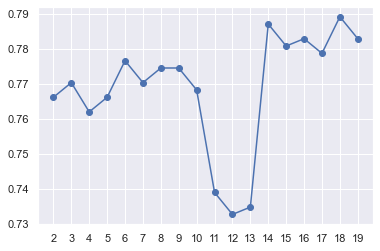

In [28]:
plt.plot(range(2, 20), scores)
plt.scatter(range(2, 20), scores)
plt.xticks(range(2, 20))

print(f'\nMax accuracy = {(max(scores)*100)}%')

In [29]:
model = KNeighborsClassifier(n_neighbors=18, n_jobs=-1)
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.8219321148825065
0.7891440501043842


#### K-Fold Cross Validation for Extreme Left Wing

In [30]:
seed = 42
num_folds = 5
scoring = 'accuracy'

In [31]:
ensembles = []
ensembles.append(('KNN', KNeighborsClassifier(n_neighbors=18, n_jobs=-1)))
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier(n_estimators=10)))
ensembles.append(('ET', ExtraTreesClassifier(n_estimators=10)))

In [32]:
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

KNN: 0.803133 (0.005376)
AB: 0.796345 (0.011077)
GBM: 0.799478 (0.008800)
RF: 0.807311 (0.006888)
ET: 0.806789 (0.010444)


### KNN Run for Extreme Right Wing

In [33]:
features = df.drop(['Event ID#', 'Year', 'Month', 'Day', 'State', 'City', 'Group', 'Dominant Ideology_Ethnonationalist-Separatist', 'Dominant Ideology_Extreme Left Wing', 'Dominant Ideology_Extreme Right Wing', 'Dominant Ideology_Religious', 'Dominant Ideology_Single Issue', 'Dominant Ideology_Unknown Ideology'], axis=1)
targets = df['Dominant Ideology_Extreme Right Wing']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)

In [35]:
scores = []
for k in range(2, 20):
    print(f'Evaluating {k} clusters')

    model = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

Evaluating 2 clusters
Evaluating 3 clusters
Evaluating 4 clusters
Evaluating 5 clusters
Evaluating 6 clusters
Evaluating 7 clusters
Evaluating 8 clusters
Evaluating 9 clusters
Evaluating 10 clusters
Evaluating 11 clusters
Evaluating 12 clusters
Evaluating 13 clusters
Evaluating 14 clusters
Evaluating 15 clusters
Evaluating 16 clusters
Evaluating 17 clusters
Evaluating 18 clusters
Evaluating 19 clusters



Max accuracy = 91.02296450939458%


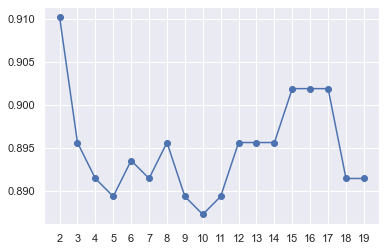

In [36]:
plt.plot(range(2, 20), scores)
plt.scatter(range(2, 20), scores)
plt.xticks(range(2, 20))

print(f'\nMax accuracy = {(max(scores)*100)}%')

In [37]:
model = KNeighborsClassifier(n_neighbors=2, n_jobs=-1)
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9122715404699739
0.9102296450939458


#### K-Fold Cross Validation for Extreme Right Wing

In [38]:
seed = 42
num_folds = 5
scoring = 'accuracy'

In [39]:
ensembles = []
ensembles.append(('KNN', KNeighborsClassifier(n_neighbors=2, n_jobs=-1)))
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier(n_estimators=10)))
ensembles.append(('ET', ExtraTreesClassifier(n_estimators=10)))

In [40]:
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

KNN: 0.875718 (0.019857)
AB: 0.879373 (0.015080)
GBM: 0.886684 (0.013272)
RF: 0.885117 (0.013816)
ET: 0.887206 (0.010099)


### KNN Run for Religious

In [41]:
features = df.drop(['Event ID#', 'Year', 'Month', 'Day', 'State', 'City', 'Group', 'Dominant Ideology_Ethnonationalist-Separatist', 'Dominant Ideology_Extreme Left Wing', 'Dominant Ideology_Extreme Right Wing', 'Dominant Ideology_Religious', 'Dominant Ideology_Single Issue', 'Dominant Ideology_Unknown Ideology'], axis=1)
targets = df['Dominant Ideology_Religious']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)

In [43]:
scores = []
for k in range(2, 20):
    print(f'Evaluating {k} clusters')

    model = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

Evaluating 2 clusters
Evaluating 3 clusters
Evaluating 4 clusters
Evaluating 5 clusters
Evaluating 6 clusters
Evaluating 7 clusters
Evaluating 8 clusters
Evaluating 9 clusters
Evaluating 10 clusters
Evaluating 11 clusters
Evaluating 12 clusters
Evaluating 13 clusters
Evaluating 14 clusters
Evaluating 15 clusters
Evaluating 16 clusters
Evaluating 17 clusters
Evaluating 18 clusters
Evaluating 19 clusters



Max accuracy = 97.28601252609603%


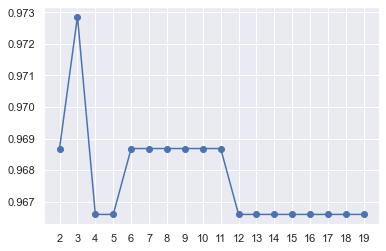

In [44]:
plt.plot(range(2, 20), scores)
plt.scatter(range(2, 20), scores)
plt.xticks(range(2, 20))

print(f'\nMax accuracy = {(max(scores)*100)}%')

In [45]:
model = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.970757180156658
0.9728601252609603


#### K-Fold Cross Validation for Religious

In [46]:
seed = 42
num_folds = 5
scoring = 'accuracy'

In [47]:
ensembles = []
ensembles.append(('KNN', KNeighborsClassifier(n_neighbors=3, n_jobs=-1)))
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier(n_estimators=10)))
ensembles.append(('ET', ExtraTreesClassifier(n_estimators=10)))

In [48]:
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

KNN: 0.959269 (0.010778)
AB: 0.955091 (0.009543)
GBM: 0.963969 (0.009105)
RF: 0.960836 (0.008893)
ET: 0.962924 (0.007083)


### KNN Run for Single Issue

In [49]:
features = df.drop(['Event ID#', 'Year', 'Month', 'Day', 'State', 'City', 'Group', 'Dominant Ideology_Ethnonationalist-Separatist', 'Dominant Ideology_Extreme Left Wing', 'Dominant Ideology_Extreme Right Wing', 'Dominant Ideology_Religious', 'Dominant Ideology_Single Issue', 'Dominant Ideology_Unknown Ideology'], axis=1)
targets = df['Dominant Ideology_Single Issue']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)

In [51]:
scores = []
for k in range(2, 20):
    print(f'Evaluating {k} clusters')

    model = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

Evaluating 2 clusters
Evaluating 3 clusters
Evaluating 4 clusters
Evaluating 5 clusters
Evaluating 6 clusters
Evaluating 7 clusters
Evaluating 8 clusters
Evaluating 9 clusters
Evaluating 10 clusters
Evaluating 11 clusters
Evaluating 12 clusters
Evaluating 13 clusters
Evaluating 14 clusters
Evaluating 15 clusters
Evaluating 16 clusters
Evaluating 17 clusters
Evaluating 18 clusters
Evaluating 19 clusters



Max accuracy = 84.34237995824635%


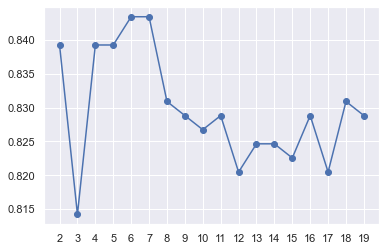

In [52]:
plt.plot(range(2, 20), scores)
plt.scatter(range(2, 20), scores)
plt.xticks(range(2, 20))

print(f'\nMax accuracy = {(max(scores)*100)}%')

In [53]:
model = KNeighborsClassifier(n_neighbors=7, n_jobs=-1)
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.8605744125326371
0.8434237995824635


#### K-Fold Cross Validation for Single Issue

In [54]:
seed = 42
num_folds = 5
scoring = 'accuracy'

In [55]:
ensembles = []
ensembles.append(('KNN', KNeighborsClassifier(n_neighbors=7, n_jobs=-1)))
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier(n_estimators=10)))
ensembles.append(('ET', ExtraTreesClassifier(n_estimators=10)))

In [56]:
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

KNN: 0.829765 (0.023493)
AB: 0.831332 (0.006310)
GBM: 0.836554 (0.008355)
RF: 0.829765 (0.014621)
ET: 0.841253 (0.014051)


## Final Analysis and Further Research

The accuracy for the KNN runs were as follows:

* Ethnonationalist-Separatist: 80.58%
* Extreme Left Wing: 78.91%
* Extreme Right Wing: 91.02%
* Religious: <span style="color:red">97.28%</span>
* Single Issue: 84.34%

>The high number for accurately identifying Religously motivated attacks gives me pause and merits further investigation. It could be that accurate, but, based on my limited experience in MSDS650, I doubt it. There may be a feature that is triggering this level of accuracy and allowing the machine to "cheat." I experienced this phenonmena during initial tests when I had some extra sub-ideology features that were actually giving the machine the answer to the target.

>The K-Fold cross validations showed a slight improvement using Extra Trees or Random Forests. This may merit some experimentation but the gains were minimal.

For further research, more detailed data on the incidents would increase the confidence in the model outcomes. For example, detailed data on attackers/ perpetrators might be another variable that could assist in classification. 
